# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 43

Członkowie: Dominik Sakłaski (415120), Roksana Jandura (416314), Karolina Murzyn (409892)

---

## Zestaw zadań 3: Ruch rowery na moście Fremont w Seattle (Notatnik 2/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
bike_traffic_data = pd.read_pickle("bike_traffic_data.pkl")
bike_traffic_data

,Total,East,West
Date,,,
2022-01-01 00:00:00,0.0,0.0,0.0
2022-01-01 01:00:00,0.0,0.0,0.0
2022-01-01 02:00:00,1.0,0.0,1.0
2022-01-01 03:00:00,0.0,0.0,0.0
2022-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 19:00:00,14.0,6.0,8.0
2022-12-31 20:00:00,20.0,13.0,7.0
2022-12-31 21:00:00,16.0,6.0,10.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

### Zadnie 2: Przegląd danych - ruch rowerowy [15 pkt]

#### a) Tabele

Przygotuj trzy tablice prezentujące różne aspekty ruchu rowerowego według poniższych wytycznych.

Tablica `daily_bike_traffic_data` prezentuje sumaryczną liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.
> Indeks: Date</br>
> `pandas.DatetimeIndex` zawierający okresy czasu, w których dokonywane były zliczenia rowerzystów.</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
       
Tablica `bike_traffic_by_weekday_data` prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

> Indeks: Day</br>
> Dni tygodnia (Monday, Tuesday ... ).</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
    
Tablica `weekday_weekend_hourly_bike_traffic_data`  prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu, a także z podziałem na dni robocze i weekend.

> Indeks: Hour </br>
> Godziny, dla których liczone są wartości średnie (0, 1, 2 ...).

> Kolumny: </br>
> 1 rzędu: Weekday, Weekend</br>
> 2 rzędu: Total, East, West (ten sam zestaw kolumn dla każdego okresu tygodnia)</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.

Zapisz tablicę `daily_bike_traffic_data` do pliku daily_bike_traffic_data.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w nich liczby rowerzystów wyświetlały się z dokładnością 0 miejsc po przecinku, a średnie liczby rowerzystów z dokładnością 2 miejsc po przecinku. W przypadku tablicy `daily_bike_traffic_data` wyświetl tylko 10 pierwszych wierszy tablicy oraz sformatuj wyświetlany indek tak aby pokazywał same daty (bez godzin).

In [5]:
# Agregacja danych z poszczególnych dni roku
daily_bike_traffic_data = bike_traffic_data.resample('D').sum()

daily_bike_traffic_data.to_pickle("daily_bike_traffic_data.pkl")

#wyświetlenie tylko 10 pierwszych wierszy, z indeksem bez godziny i liczbami całkowitymi
display(
    daily_bike_traffic_data.head(10)
    .style.format(precision=0)
    .format_index(lambda x: x.strftime('%Y-%m-%d'), axis=0)
)


,Total,East,West
Date,,,
2022-01-01,33,23,10
2022-01-02,37,20,17
2022-01-03,253,93,160
2022-01-04,577,220,357
2022-01-05,713,261,452
2022-01-06,588,231,357
2022-01-07,650,250,400
2022-01-08,1147,548,599
2022-01-09,1923,912,1011


In [6]:
### Komórka testowa

# Test 1 Kształt tablicy
assert daily_bike_traffic_data.shape == (365, 3)
# Test 2 Kolumny
assert len(set(list(daily_bike_traffic_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (daily_bike_traffic_data.index.name == 'Date') == True
assert isinstance(weather_data.index, pd.DatetimeIndex) == True
assert weather_data.index.values.min() == np.datetime64('2022-01-01T00:00:00.000000000')
assert weather_data.index.values.max() == np.datetime64('2022-12-31T00:00:00.000000000')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].min().values, np.array([23., 12., 10.]))) == True
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].max().values, np.array([4233., 1733., 3031.]))) == True

In [7]:
# Agregacja danych z poszczególnych dni tygodnia
# YOUR CODE HERE
temp_df = daily_bike_traffic_data.copy()
temp_df['Day'] = temp_df.index.day_name()

bike_traffic_by_weekday_data = (
    temp_df.groupby('Day')[['Total', 'East', 'West']].agg('mean')
)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_traffic_by_weekday_data = bike_traffic_by_weekday_data.loc[ordered_days]

display(bike_traffic_by_weekday_data.style.format(precision=2))

,Total,East,West
Day,,,
Monday,2093.15,820.81,1272.35
Tuesday,2579.96,983.83,1596.13
Wednesday,2538.46,971.58,1566.88
Thursday,2406.71,926.60,1480.12
Friday,2087.44,843.54,1243.90
Saturday,1929.96,843.92,1086.04
Sunday,1664.44,771.58,892.87


In [8]:
### Komórka testowa

# Test 1 Kształt tablicy
assert bike_traffic_by_weekday_data.shape == (7, 3)
# Test 2 Kolumny
assert len(set(list(bike_traffic_by_weekday_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (bike_traffic_by_weekday_data.index.name == 'Day') == True
assert len(set(list(bike_traffic_by_weekday_data.index)) & set(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])) == 7
# Test 4 Zawartość kolumn
assert np.all(np.isclose(bike_traffic_by_weekday_data.min().values, np.array([1664.44230769,  771.57692308,  892.86538462]))) == True
assert np.all(np.isclose(bike_traffic_by_weekday_data.max().values, np.array([2579.96153846,  983.82692308, 1596.13461538]))) == True

In [9]:
# Agregacja danych z konkretnych okresów tygodnia (dzień roboczy/weekend)
# YOUR CODE HERE
temp_df = bike_traffic_data.copy()
temp_df['Hour'] = temp_df.index.hour
temp_df['Is_Weekend'] = temp_df.index.dayofweek >= 5  # True = weekend
grouped = temp_df.groupby(['Hour', 'Is_Weekend'])[['Total', 'East', 'West']].mean()
weekday_data = grouped.xs(False, level='Is_Weekend').add_prefix('Weekday_')
weekend_data = grouped.xs(True, level='Is_Weekend').add_prefix('Weekend_')
weekday_weekend_hourly_bike_traffic_data = pd.concat([weekday_data, weekend_data], axis=1)
weekday_weekend_hourly_bike_traffic_data.index.name = 'Hour'
display(
    weekday_weekend_hourly_bike_traffic_data
    .style.format('{:.2f}')
)

,Weekday_Total,Weekday_East,Weekday_West,Weekend_Total,Weekend_East,Weekend_West
Hour,,,,,,
0,6.57,2.53,4.04,14.65,6.19,8.46
1,3.07,1.24,1.83,8.71,3.30,5.42
2,1.99,0.93,1.06,5.34,2.30,3.04
3,1.75,0.87,0.88,2.83,1.30,1.53
4,6.89,2.46,4.43,3.34,1.08,2.27
5,19.97,7.39,12.58,5.36,1.99,3.37
6,70.69,29.96,40.73,16.30,6.21,10.10
7,167.51,72.51,95.00,27.57,11.28,16.30
8,236.53,99.02,137.52,57.06,24.93,32.12


In [10]:
### Komórka testowa

# Test 1 Kształt tablicy
assert weekday_weekend_hourly_bike_traffic_data.shape == (24, 6)
# Test 2 Kolumny
assert len(set(list(weekday_weekend_hourly_bike_traffic_data.columns)) & set(list(weekday_weekend_hourly_bike_traffic_data.columns))) == 6
# Test 3 Indeks
assert (weekday_weekend_hourly_bike_traffic_data.index.name == 'Hour') == True
assert weekday_weekend_hourly_bike_traffic_data.index.values.min() == 0
assert weekday_weekend_hourly_bike_traffic_data.index.values.max() == 23
# Test 4 Zawartość kolumn
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.min().values, np.array([1.75, 0.87307692, 0.87692308, 2.82857143, 1.07619048, 1.53333333]))) == True
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.max().values, np.array([324.42307692, 99.01923077, 225.72307692, 187.73333333, 87.79047619, 99.94285714]))) == True

#### b) Wykresy

Zwizualizuj dane z tablic `daily_bike_traffic_data`, `bike_traffic_by_weekday_data` oraz `weekday_weekend_hourly_bike_traffic_data` za pomocą wykresów liniowych. Przygotuj:
- wykres prezentujący liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w dni robocze w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w weekendy w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x3, przy czym wykres sum dziennych zajmuje wszystkie trzy pola w górnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów (każdy z parametrów ma na wszystkich wykresach ten sam kolor),
- dodaj do figury pojedynczą legendę zawierającą nazwy zwizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami,
- dopasuj zakresy osi wykresów do zakresu wartości danych.

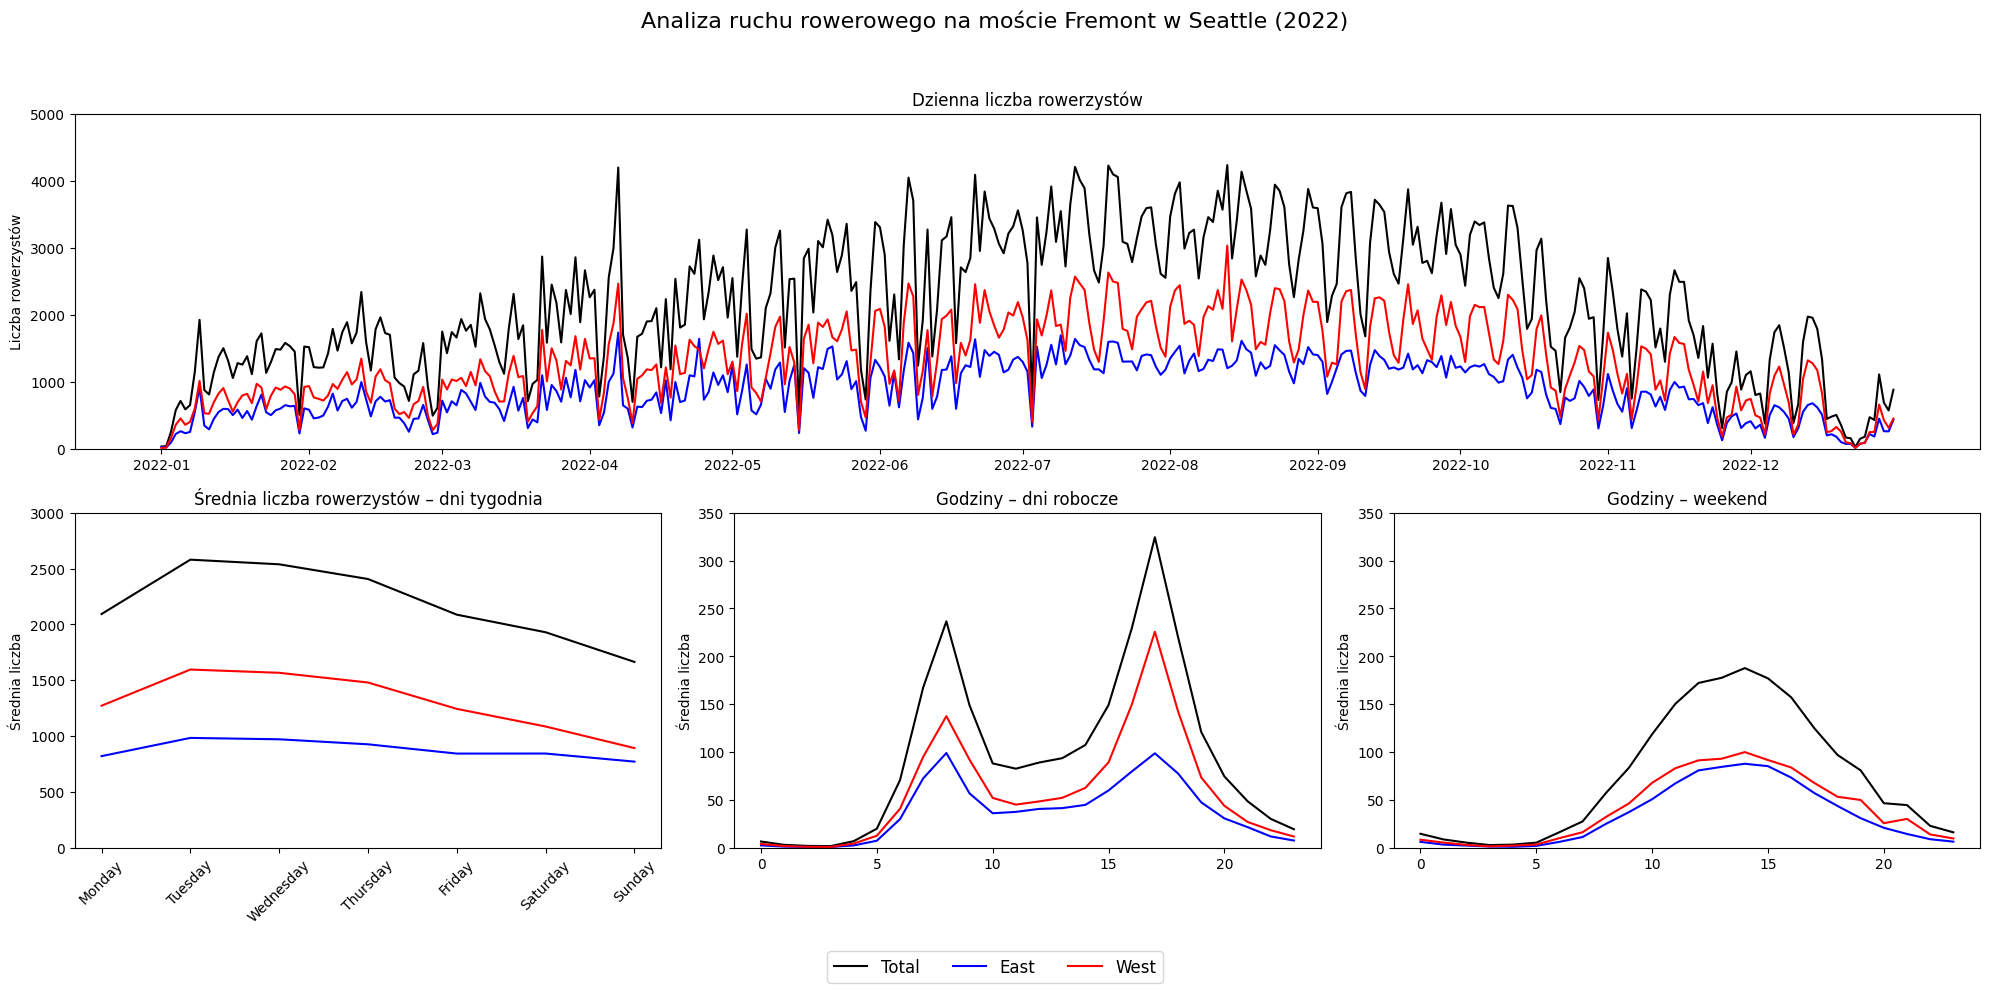

In [11]:
# YOUR CODE HERE
fig = plt.figure(figsize=(20, 10),  facecolor="white")
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])  # 2 wiersze, 3 kolumny

# Wykres 1 – pełna szerokość
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(daily_bike_traffic_data.index, daily_bike_traffic_data['Total'], label='Total', color='black')
ax1.plot(daily_bike_traffic_data.index, daily_bike_traffic_data['East'], label='East', color='blue')
ax1.plot(daily_bike_traffic_data.index, daily_bike_traffic_data['West'], label='West', color='red')
ax1.set_title('Dzienna liczba rowerzystów')
ax1.set_ylabel('Liczba rowerzystów')
ax1.set_ylim(0, 5000)
xticks = pd.date_range(start="2022-01-01", end="2022-12-31", freq="MS")  # co miesiąc
ax1.set_xticks(xticks)
ax1.set_xticklabels([d.strftime('%Y-%m') for d in xticks])

# Wykres 2 – lewy dolny
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(bike_traffic_by_weekday_data.index, bike_traffic_by_weekday_data['Total'], label='Total', color='black')
ax2.plot(bike_traffic_by_weekday_data.index, bike_traffic_by_weekday_data['East'], label='East', color='blue')
ax2.plot(bike_traffic_by_weekday_data.index, bike_traffic_by_weekday_data['West'], label='West', color='red')
ax2.set_title('Średnia liczba rowerzystów – dni tygodnia')
ax2.set_ylabel('Średnia liczba')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 3000)

# Wykres 3 – środkowy dolny
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data['Weekday_Total'], label='Total', color='black')
ax3.plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data['Weekday_East'], label='East', color='blue')
ax3.plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data['Weekday_West'], label='West', color='red')
ax3.set_title('Godziny – dni robocze')
ax3.set_xticks(range(0, 24, 5))
ax3.set_ylabel('Średnia liczba')
ax3.set_ylim(0, 350)

# Wykres 4 – prawy dolny
ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data['Weekend_Total'], label='Total', color='black')
ax4.plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data['Weekend_East'], label='East', color='blue')
ax4.plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data['Weekend_West'], label='West', color='red')
ax4.set_title('Godziny – weekend')
ax4.set_xticks(range(0, 24, 5))
ax4.set_ylabel('Średnia liczba')
ax4.set_ylim(0, 350)

fig.suptitle('Analiza ruchu rowerowego na moście Fremont w Seattle (2022)', fontsize=16)

# Legenda wspólna
fig.legend(['Total', 'East', 'West'], loc='lower center', ncol=3, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Zadnie 3: Przegląd danych - pogoda [15 pkt]

#### a) Tabela

Przygotuj tablicę `monthly_weather_data` zawierającą dane z tablicy `weather_data` zagregowane w obrębie poszczególnych miesięcy według następującego klucza:
- wartość minimalna z całego miesiąca: Temperature: Min,
- wartość maksymalna z całego miesiąca: Temperature: Max, Wind: Max speed,
- suma z całego miesiąca: Precipitation: Total, Snow: Fall,
- średnia z całego miesiąca: Temperature: Avg, Snow: Depth, Wind: Avg speed, Sky: Cloud cover.

Tablica powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: Date</br>
> `pandas.DatetimeIndex` zawierający okresy czasu, których dotyczą dane z raportów pogodowych.</br>

> Kolumny: W podanej niżej kolejności</br>
> Temperature: Min, Avg, Max</br>
> Precipitation: Total</br>
> Snow: Fall, Depth</br>
> Wind: Avg speed, Max speed</br>
> Sky: Cloud cover</br>
> (Nazwa 1 poziomu: podległe jej nazwy 2 poziomu)

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 2 miejsc po przecinku, a indeks pokazywał same daty (rok i miesiąc bez dnia oraz godzin).

In [12]:
# YOUR CODE HERE
weather_data[("Snow","Depth")] = weather_data[("Snow","Depth")]

tuples = [("Temperature", "Min"), ("Temperature","Avg"), ("Temperature", "Max"), ("Precipitation","Total"), ("Snow","Fall"),
           ("Snow","Depth"), ("Wind","Avg speed"), ("Wind", "Max speed"), ("Sky", "Cloud cover")]
columns = pd.MultiIndex.from_tuples(tuples)
agg = weather_data.copy().groupby(pd.Grouper(freq='MS'))
operations = ['min','mean','max','sum','sum','mean','mean','max','mean']

monthly_weather_data = pd.DataFrame()
for i in range(len(columns)):
    monthly_weather_data[columns[i:i+1]] = agg[columns[i:i+1]].agg(operations[i])
monthly_weather_data.columns = columns
monthly_weather_data.index = monthly_weather_data.index.to_period("M").to_timestamp()
monthly_weather_data.index.name = 'Date'
display(monthly_weather_data.style.format(precision=2).format_index(lambda x: x.strftime('%Y-%m'), axis=0))


In [13]:
### Komórka testowa
# Test 1 Kształt tablicy
assert monthly_weather_data.shape == (12, 9)
# Test 2 Kolumny
assert len(set(list(monthly_weather_data.columns)) & set([('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'),
            ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')])) == 9
# Test 3 Indeks
assert (monthly_weather_data.index.name == 'Date') == True
assert isinstance(bike_traffic_data.index, pd.DatetimeIndex)
assert bike_traffic_data.index.values.min() == np.datetime64('2022-01-01T00:00:00.000000000')
assert bike_traffic_data.index.values.max() == np.datetime64('2022-12-31T23:00:00.000000000')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(monthly_weather_data.min().values, np.array([-7.77777778, 3.90681004, 13.33333333, 1.27, 0., 0., 2.93603606, 8.0467, 0.43870968]))) == True
assert np.all(np.isclose(monthly_weather_data.max().values, np.array([11.66666667, 21.27240143, 35., 191.77, 119.38, 5.08, 3.97864611, 16.54043889, 0.86774194]))) == True

#### b) Wykresy

Zwizualizuj dane z tablicy `weather_data` za pomocą następującego zestawu wykresów:
- temperatura dzienna (minimalna, średnia i maksymalna), wypełnij kolorem przestrzeń między temperaturą minimalną i maksymalną,
- dzienne zachmurzenie (lewa oś wykresu) i opady (prawa oś wykresu), wypełnij kolorem przestrzeń pod każdym z wykresów,
- dzienna średnia i maksymalna prędkość wiatru.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x1). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów,
- dodaj do figury pojedynczą legendę zawierającą nazwy wizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami, uwzględnij w legendzie nie tylko kolory linii, ale również zastosowanych wypełnień,
- dopasuj zakresy osi wykresów do zakresu danych, w szczególności dobierz skale osi Y tak, aby wykresy opadów i zachmurzenia nie przysłaniały się wzajemnie,
- w opisach osi Y umieść jednostki, w których wyrażone są wartości widoczne na wykresach.

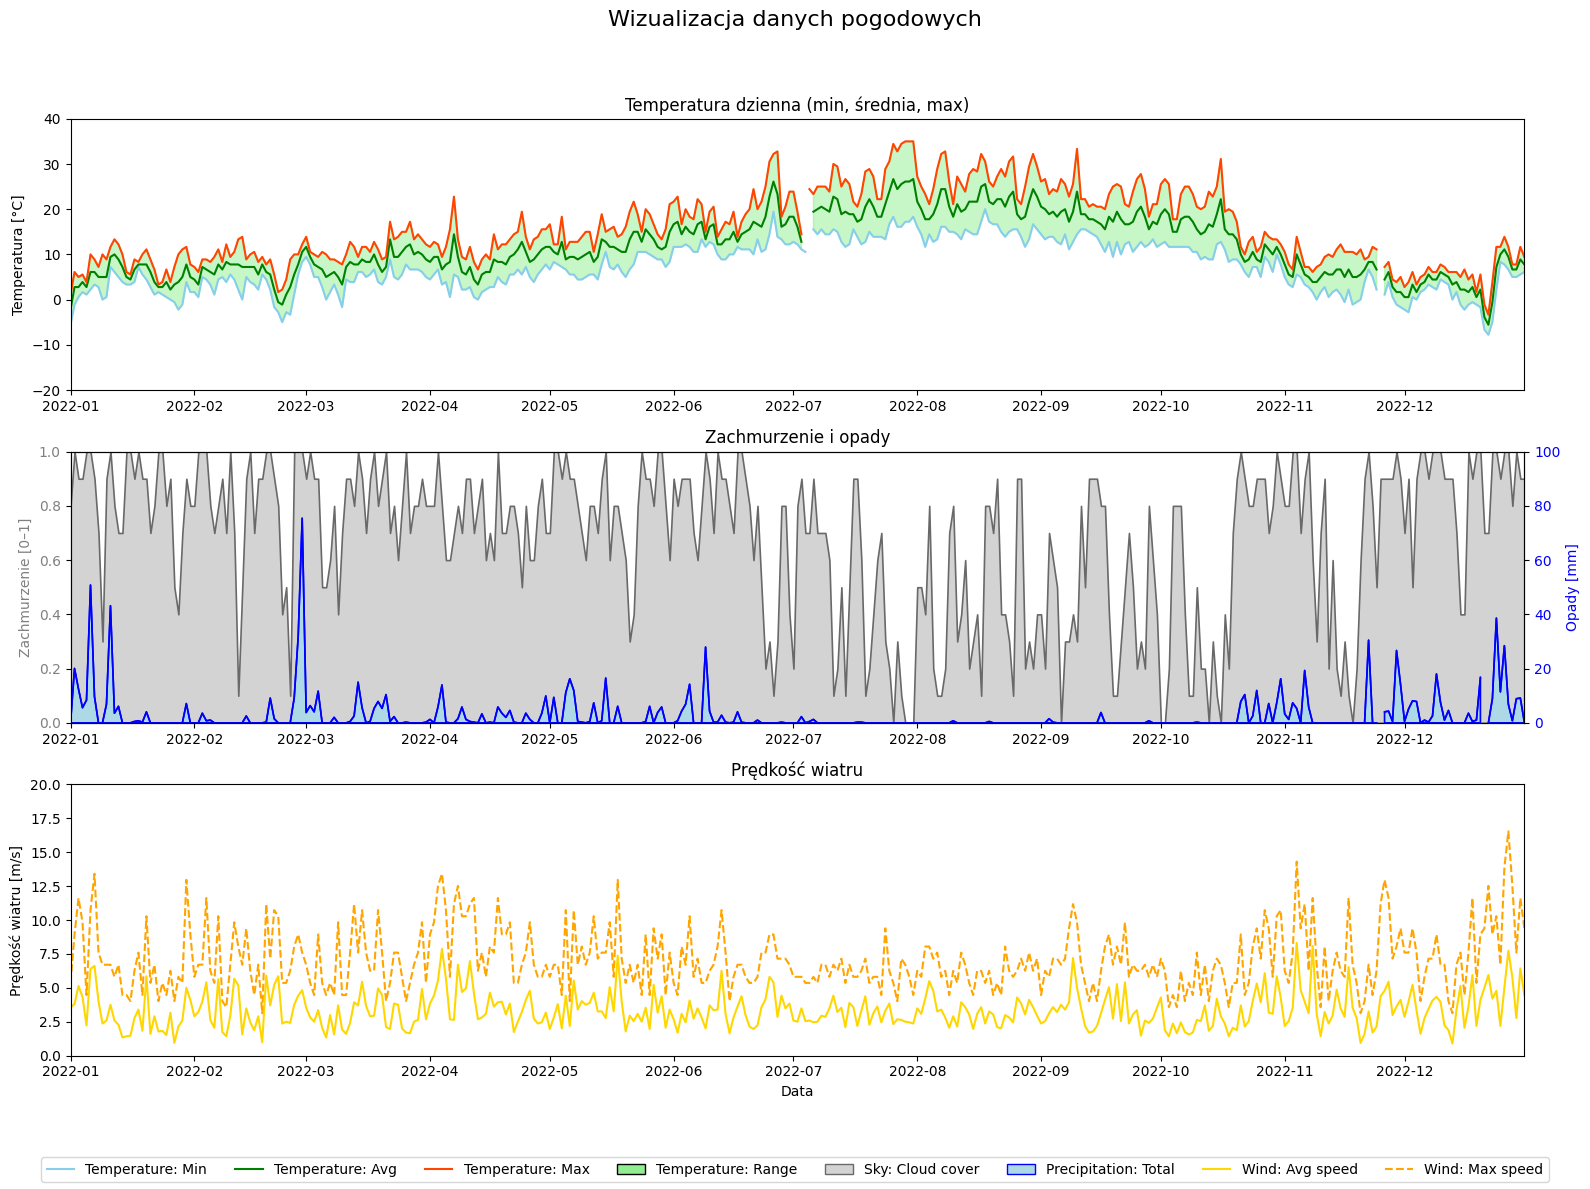

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(16, 12), facecolor="white")
fig.suptitle("Wizualizacja danych pogodowych", fontsize=16)

# Wykres 1
fill_temp = axs[0].fill_between(
    weather_data.index,
    weather_data[('Temperature', 'Min')],
    weather_data[('Temperature', 'Max')],
    color='lightgreen',
    alpha=0.5
)
tmin, = axs[0].plot(weather_data.index, weather_data[('Temperature', 'Min')], color='skyblue')
tavg, = axs[0].plot(weather_data.index, weather_data[('Temperature', 'Avg')], color='green')
tmax, = axs[0].plot(weather_data.index, weather_data[('Temperature', 'Max')], color='orangered')
axs[0].set_ylabel("Temperatura [°C]")
axs[0].set_ylim(-20, 40)
axs[0].set_title("Temperatura dzienna (min, średnia, max)")

# Wykres 2
ax2_left = axs[1]
ax2_right = ax2_left.twinx()
cloud = ax2_left.fill_between(
    weather_data.index,
    0,
    weather_data[('Sky', 'Cloud cover')],
    facecolor='lightgray',
    edgecolor='dimgray',
    linewidth=1.2
)
ax2_left.set_ylabel("Zachmurzenie [0–1]", color='gray')
ax2_left.tick_params(axis='y', labelcolor='gray')
ax2_left.set_ylim(0, 1)
ax2_left.set_title("Zachmurzenie i opady")
precip_fill = ax2_right.fill_between(
    weather_data.index,
    0,
    weather_data[('Precipitation', 'Total')],
    facecolor='lightblue',
    edgecolor='blue',
    linewidth=1.2
)
precip_line, = ax2_right.plot(
    weather_data.index,
    weather_data[('Precipitation', 'Total')],
    color='blue',
    linewidth=1.2
)
ax2_right.set_ylabel("Opady [mm]", color='blue')
ax2_right.tick_params(axis='y', labelcolor='blue')
ax2_right.set_ylim(0, 100)

# Wykres 3
wind_avg, = axs[2].plot(weather_data.index, weather_data[('Wind', 'Avg speed')], color='gold')
wind_max, = axs[2].plot(weather_data.index, weather_data[('Wind', 'Max speed')], color='orange', linestyle='--')
axs[2].set_ylabel("Prędkość wiatru [m/s]")
axs[2].set_ylim(0, 20)
axs[2].set_title("Prędkość wiatru")
axs[2].set_xlabel("Data")

xticks = pd.date_range(start="2022-01-01", end="2022-12-31", freq="MS")
for ax in axs:
    ax.set_xticks(xticks)
    ax.set_xticklabels([d.strftime('%Y-%m') for d in xticks])
    ax.margins(x=0)
ax2_right.margins(x=0)

# Legenda wspólna
fig.legend([
    Line2D([0], [0], color='skyblue'),
    Line2D([0], [0], color='green'),
    Line2D([0], [0], color='orangered'),
    Patch(facecolor='lightgreen', edgecolor='black'),
    Patch(facecolor='lightgray', edgecolor='dimgray'),
    Patch(facecolor='lightblue', edgecolor='blue'),
    Line2D([0], [0], color='gold'),
    Line2D([0], [0], color='orange', linestyle='--')
], [
    'Temperature: Min',
    'Temperature: Avg',
    'Temperature: Max',
    'Temperature: Range',
    'Sky: Cloud cover',
    'Precipitation: Total',
    'Wind: Avg speed',
    'Wind: Max speed'
], loc='lower center', ncol=8, fontsize=10)

plt.tight_layout(rect=[0, 0.06, 1, 0.95])
plt.show()